<a href="https://colab.research.google.com/github/rahmany1/Data-Analytics/blob/main/Berlin-Rental_DS_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Session #3: Data Summary / Satistics - Homework Assignment


## Lecture Structure:

1. Measure of central tendency

- Mean
- Median
- Mode

2. Measure of spread

- Range
- Standard Deviation

3. Correlation coeffcient

## We will use:
- `statistics.mean()`,
`statistics.median()`,
`statistics.mean()`,
`groupby.mean()`,
`groupby.median()`,
`gmean()`,
`statistics.stdev()`,
`corr()`,
`numpy.corrcoef()`

In [ ]:
### Importing libraries and packages
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
### Reading data

rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/ç.csv")

In [ ]:
rentals.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


## **Question #1**

Identify the best region to live, based on:

1. Average Price

2. Average Rooms Available

3. Average Space

4. What type of apartment condition is mostly available in Mitte, Kruezberg and Wilmersforf respectively?

In [ ]:
### Identify the best region to live, based on: Average Price

rentals.groupby('Region')['Rent'].mean()


,Rent
Region,
Charlottenburg,1753.452532
Friedrichsfelde,1043.871731
Kreuzberg,2049.138085
Köpenick,1125.475818
Mitte,2408.725033
Neukölln,1188.114915
Prenzlauer,1996.962264
Tiergarten,1914.824795
Wedding,847.138571


In [ ]:
### Identify the best region to live, based on: Average Rooms Available
rentals.groupby('Region')['Rooms'].mean()

,Rooms
Region,
Charlottenburg,2.525316
Friedrichsfelde,2.500000
Kreuzberg,2.489362
Köpenick,2.281818
Mitte,2.754902
Neukölln,2.279661
Prenzlauer,2.660377
Tiergarten,2.736842
Wedding,1.726190


In [ ]:
### Identify the best region to live, based on: Average Space
rentals.groupby('Region')['Space'].mean()


,Space
Region,
Charlottenburg,88.083038
Friedrichsfelde,66.145000
Kreuzberg,92.258723
Köpenick,74.279273
Mitte,96.235556
Neukölln,69.849831
Prenzlauer,95.832264
Tiergarten,90.228304
Wedding,46.928571


In [ ]:
### What type of apartment condition is mostly available in Mitte, Kruezberg and Wedding respectively?
rentals1=rentals[rentals['Region'].isin(['Mitte','Kreuzberg','Wedding'])]
rentals1.groupby('Region')['Condition'].value_counts()


Region     Condition                         
Kreuzberg  mint_condition                        17
           first_time_use                        11
           no_information                         7
           well_kept                              4
           first_time_use_after_refurbishment     2
           fully_renovated                        2
           modernized                             2
           refurbished                            2
Mitte      mint_condition                        49
           first_time_use                        43
           no_information                        29
           refurbished                           15
           first_time_use_after_refurbishment     7
           well_kept                              6
           fully_renovated                        3
           modernized                             1
Wedding    mint_condition                        16
           no_information                        10
           first_time_use                         5
           well_kept                              5
           first_time_use_after_refurbishment     2
           need_of_renovation                     2
           fully_renovated                        1
           modernized                             1
Name: count, dtype: int64

## **Question #2**

1. In what location are both the mean and median are same in terms of apartment Space?
2. Identify the location where the apartment rent variation is the highest
3. What is the average price of 2 room apartment in Mitte?

In [ ]:
### In what location are both the mean and median are same in terms of apartment Space?
rentals.groupby('Region')['Space'].mean() == rentals.groupby('Region')['Space'].median()


,Space
Region,
Charlottenburg,False
Friedrichsfelde,False
Kreuzberg,False
Köpenick,False
Mitte,False
Neukölln,False
Prenzlauer,False
Tiergarten,False
Wedding,False


In [ ]:
### Identify the location where the apartment rent variation is very the highest
rentals.groupby('Region')['Rent'].std().sort_values(ascending=False)


,Rent
Region,
Mitte,1543.059190
Kreuzberg,1172.802355
Charlottenburg,1125.786523
Prenzlauer,1088.544439
Wilmersdorf,941.443278
Tiergarten,786.464690
Neukölln,552.145415
Friedrichsfelde,403.402469
Köpenick,390.822563


In [ ]:
### What is the average price of 2 room apartment in Mitte?
rentals[(rentals['Region'] == 'Mitte') & (rentals['Rooms'] == 2)]['Rent'].mean()

np.float64(1805.7333333333336)

## **Question #3**

Identify an outlier from the rentals dataset. Statistically show the difference in central tendency with and without those outliers.



**Hint**

Identify the outliers visually with a plot.

<Axes: >

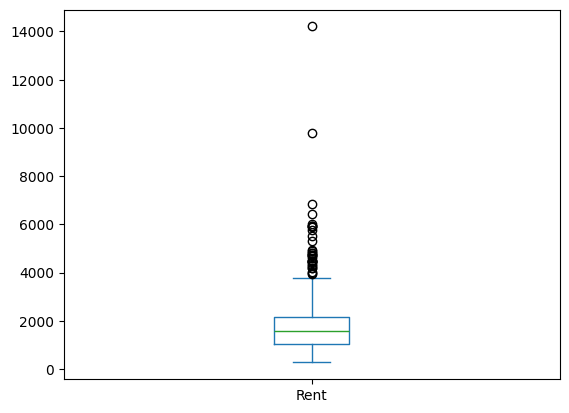

In [ ]:
#Answer
rentals['Rent'].plot.box()


## **EXTRA MATERIAL**

**Using groupby with different functions for different columns**

The `.agg()` method also allows you to apply different functions to different columns. It's done by using a dictionary where the columns selected are the keys, and the functions you want to apply to each columns are the values. There is no need to select the columns before applying `.agg()` in this case, as the columns are selected inside the dictionary.

**Useful aggregation functions:**
- `mean()`
- `median()`
- `var()`
- `std()`
- `min()`
- `max()`
- `count()`
- `sum()`
- `nunique()`

**Bonus question #1:**

Revisit the `describe()` method from session #1. Study the output of the describe method, draw a simple barplot or any visual diagram for the dataset and check your understanding about the dataset.

<Axes: xlabel='Space', ylabel='Rent'>

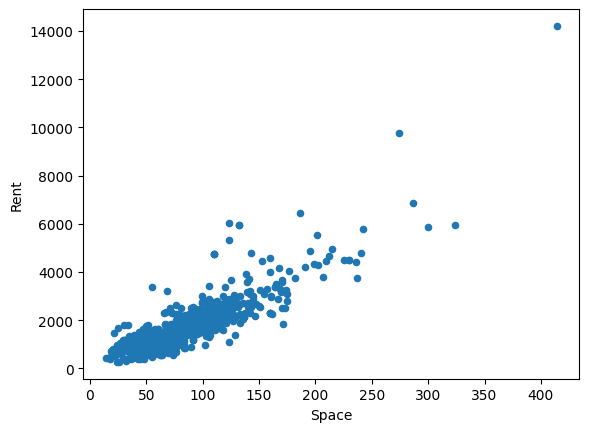

In [ ]:
### Bonus question #1:
rentals.describe()
rentals.plot.scatter(x='Space',y='Rent')

<Axes: >

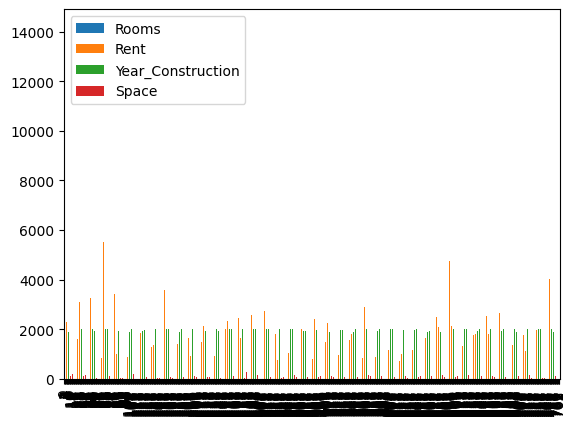

In [ ]:
rentals.plot.bar()

**Bonus question #2:**

Below mentioned are the points for 2 teams who participated in a Premiere league football batch. When a team wins a match, they get **3** points, if they lose the match then they get **0** points and if the match is draw then they get **1** point.

Study the data and share your understanding, mainly

According to you, Which team has performed better, why?

Team A : { 3,1,3,1,3,1,0,1,0,1,0,0,1,3,3,1,1,3,1,0 }

Team B : { 3,1,3,1,3,0,0,0,0,0,0,0,1,3,3,1,1,3,1,3 }

In [ ]:

### Bonus question #2:
TeamA=(3,1,3,1,3,1,0,1,0,1,0,0,1,3,3,1,1,3,1,0)
TeamB=[3,1,3,1,3,0,0,0,0,0,0,0,1,3,3,1,1,3,1,3]
TeamA.count(3)
TeamB.count(3)

7

**Bonus question #3**

Dependent vs independent variables - do you how to identify them? You can read about them here, or go straight to the task below:
https://www.statology.org/independent-vs-dependent-variables/

For the rentals dataset, identify:
- dependent variable
- indpendent variable(s)

Statistically prove their relation, use the help of visual diagram whenever necessary.

In [ ]:
### Bonus question #3:
